In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [16]:
data=pd.read_csv("C:/Users/Administrator/OneDrive/Desktop/Regression/data.csv")
data


,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0
...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0
1384,0.52466,4.9,6.5,63.0,37.0
1385,0.88197,3.9,6.2,54.0,36.0
1386,0.47336,3.5,7.3,61.0,34.0


In [17]:
data.describe()


,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


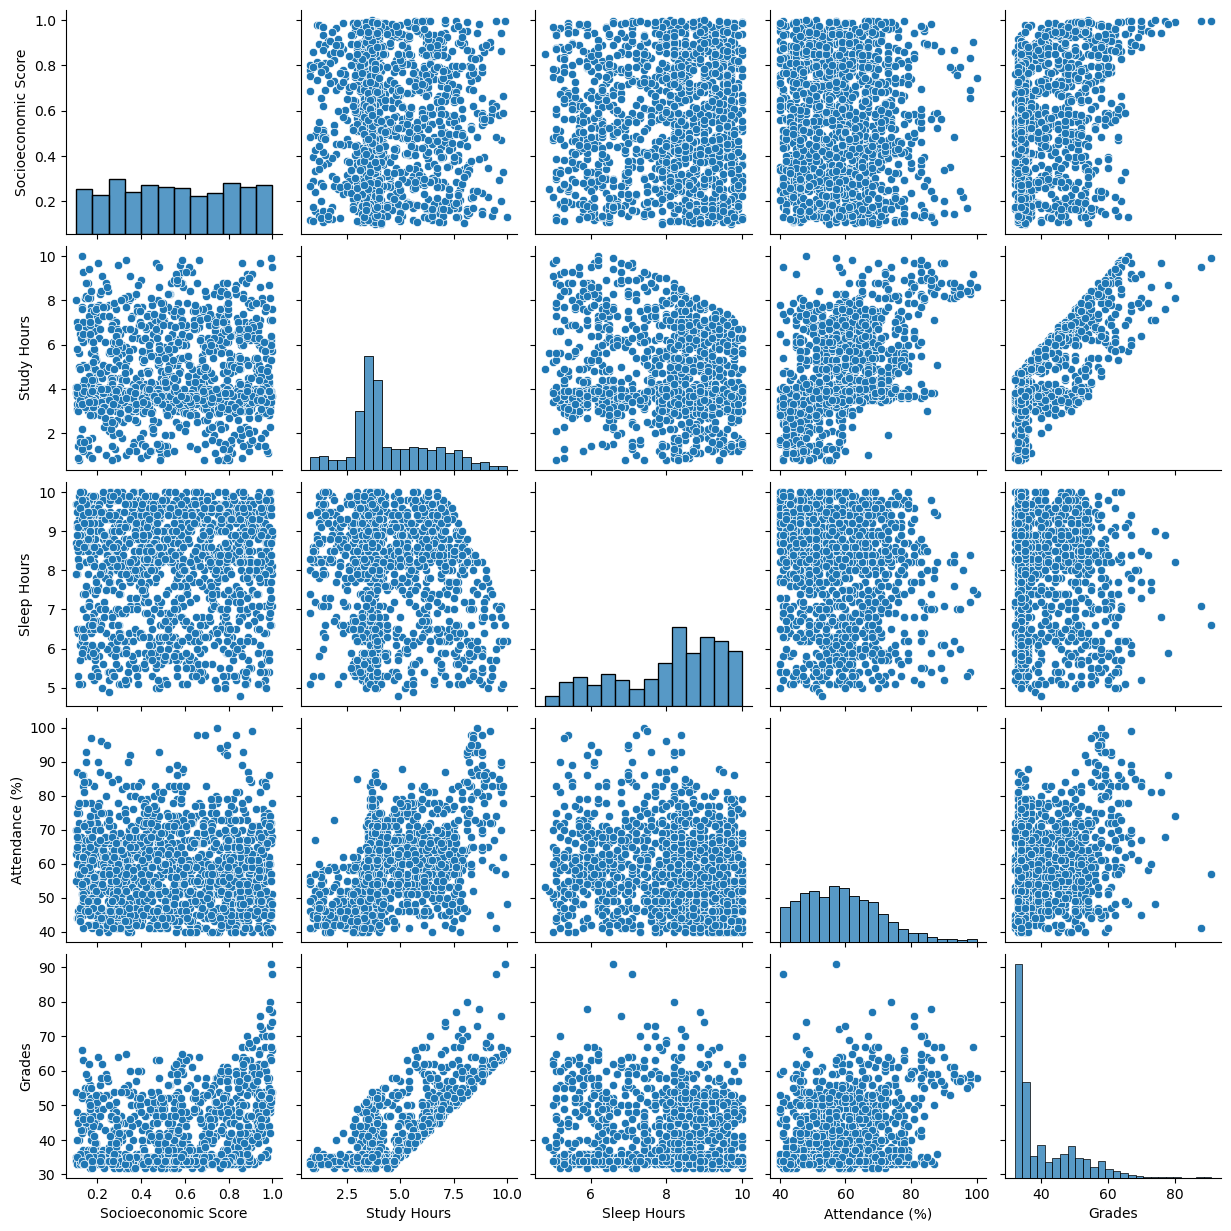

In [18]:
sbn.pairplot(data)
plt.show()

<Axes: xlabel='Grades', ylabel='Count'>

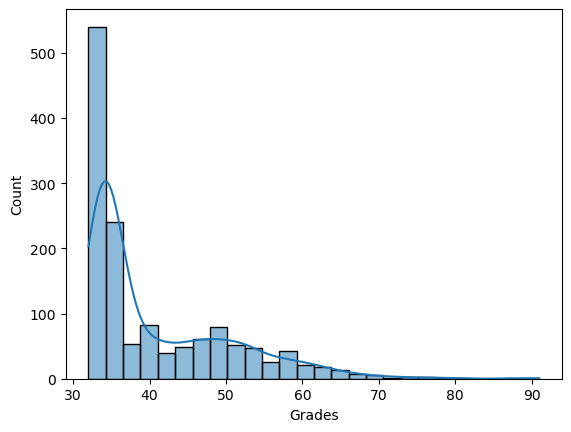

In [19]:
Y=data["Grades"].values
X=data.drop("Grades",axis=1).values

sbn.histplot(data["Grades"], kde=True)


In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)

                     Socioeconomic Score  Study Hours  Sleep Hours  \
Socioeconomic Score             1.000000     0.002151     0.013618   
Study Hours                     0.002151     1.000000    -0.187204   
Sleep Hours                     0.013618    -0.187204     1.000000   
Attendance (%)                 -0.022793     0.485408    -0.105758   
Grades                          0.335033     0.810807    -0.124689   

                     Attendance (%)    Grades  
Socioeconomic Score       -0.022793  0.335033  
Study Hours                0.485408  0.810807  
Sleep Hours               -0.105758 -0.124689  
Attendance (%)             1.000000  0.321930  
Grades                     0.321930  1.000000  


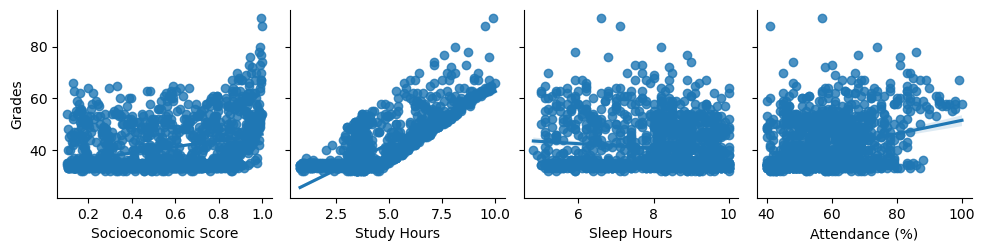

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(x_train)
X_test_scale=scaler.transform(x_test)


sbn.pairplot(data, y_vars="Grades", x_vars=data.drop("Grades", axis=1).columns, kind="reg")

corr_matrix = data.corr()
print(corr_matrix)


In [23]:
from sklearn.svm import SVR
svr=SVR(kernel="rbf",epsilon=0.1)
svr.fit(X_train_scale,y_train)

SVR()

R^2 (SVR_train): 0.8814078394831361
R^2 (SVR_test): 0.9117542661608178


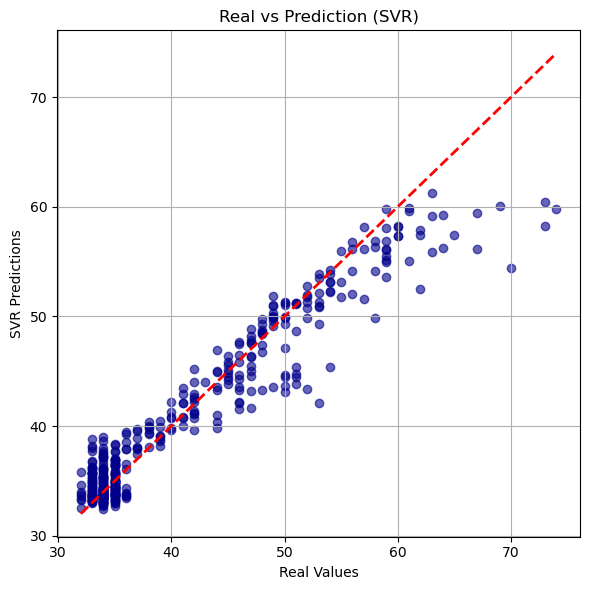

In [24]:
y_pred=svr.predict(X_test_scale)

r2_sklearn_train = svr.score(X_train_scale, y_train)  # Test verileri ile R^2
r2_sklearn_test = svr.score(X_test_scale, y_test)  # Test verileri ile R^2


print("R^2 (SVR_train):", r2_sklearn_train)
print("R^2 (SVR_test):", r2_sklearn_test)
mean_squared_error(y_test,y_pred)

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='darkblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Real Values")
plt.ylabel("SVR Predictions")
plt.title("Real vs Prediction (SVR)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5] 
}


In [26]:
svr2 = SVR(kernel='rbf')  

grid_search = GridSearchCV(
    estimator=svr2,
    param_grid=param_grid,
    cv=5,  # 5 katlı çapraz doğrulama
    scoring='r2',  # değerlendirme metriği
                                                                  
)

grid_search.fit(X_train_scale, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scale)



Best Parameters: {'C': 100, 'epsilon': 0.1}
Best R² score: 0.9752378338423388


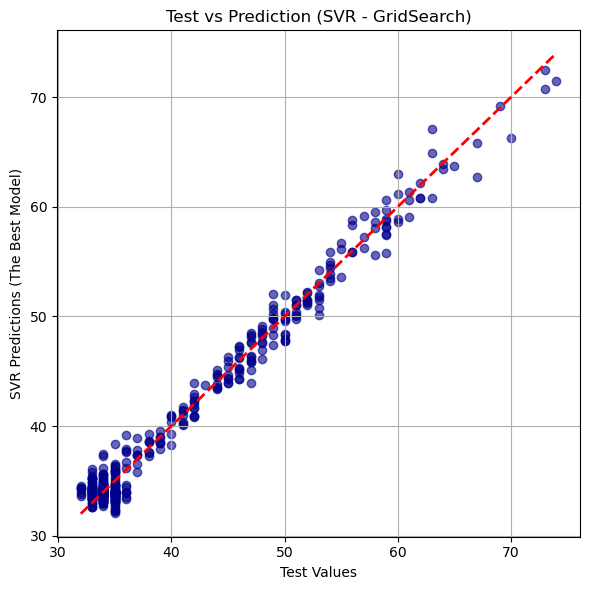

The Best R²: 0.9899446498587028
Test R²: 0.981616293608432


In [27]:



plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best, color='darkblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Test Values")
plt.ylabel("SVR Predictions (The Best Model)")
plt.title("Test vs Prediction (SVR - GridSearch)")
plt.grid(True)
plt.tight_layout()
plt.show()
 
 

r2_train = best_model.score(X_train_scale, y_train)
r2_test = best_model.score(X_test_scale, y_test)

print("The Best R²:", r2_train)
print("Test R²:", r2_test)



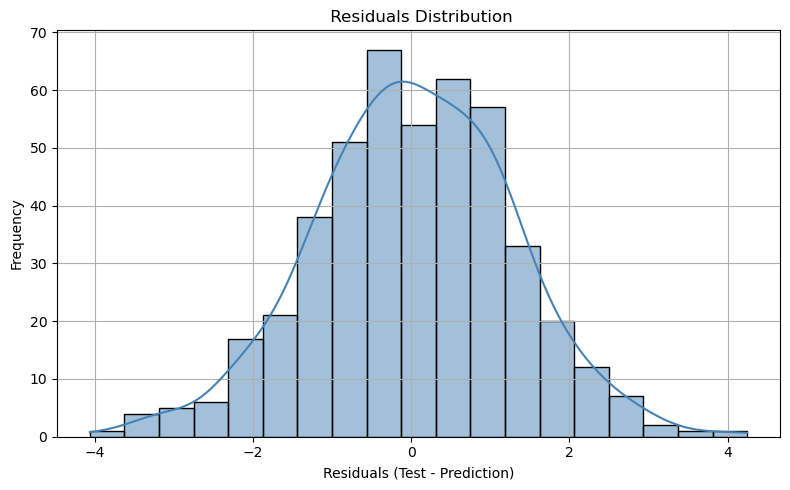

In [28]:


residuals = y_test - y_pred_best


plt.figure(figsize=(8, 5))
sbn.histplot(residuals, kde=True, color='steelblue')
plt.title(" Residuals Distribution")
plt.xlabel("Residuals (Test - Prediction)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
